In [1]:
import eli5
from eli5.lime import TextExplainer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# from moseq2_nlp.data import get_embedding_representation, get_transition_representation, get_usage_representation, load_groups
import moseq2_nlp.train as trainer
from typing import Literal

from moseq2_viz.util import parse_index
from moseq2_viz.model.util import (get_transition_matrix, parse_model_results)
from tqdm import tqdm
from typing import Dict, List


# Transitions

In [2]:
def load_groups(index_file: str, custom_groupings: List[str]) -> Dict[str, str]:
    # Get group names available in model
    _, sorted_index = parse_index(index_file)
    available_groups = list(set([sorted_index['files'][uuid]['group'] for uuid in sorted_index['files'].keys()]))

    # { subgroup: supergroup }
    group_mapping: Dict[str, str] = {}

    if custom_groupings is None or len(custom_groupings) <= 0:
        for g in available_groups:
            group_mapping[g] = g

    else:
        for supergroup in custom_groupings:
            subgroups = supergroup.split(',')
            for subg in subgroups:
                if subg not in available_groups:
                    print(f'WARNING: subgroup "{subg}" from supergroup "{supergroup}" not found in model! Omitting...')
                    continue

                if subg in group_mapping:
                    print(f'WARNING: subgroup "{subg}" from supergroup "{supergroup}" already registered to supergroup "{group_mapping[subg]}"! Omitting...')
                    continue

                group_mapping[subg] = supergroup

    return group_mapping

In [3]:
def get_feature_names(index_path, model_file, group_map):
    _, sorted_index = parse_index(index_path)
    model = parse_model_results(model_file, sort_labels_by_usage=True, count='usage')
    label_group = [sorted_index['files'][uuid]['group'] for uuid in model['keys']]

    tm_vals = []
    out_groups = []
    for l, g in zip(tqdm(model['labels']), label_group):
        if g in group_map.keys():
            tm = get_transition_matrix([l], combine=True, max_syllable=100)
            tm_vals.append(tm.ravel())
            out_groups.append(group_map[g])

    # Post-processing including truncation of transitions
    # Truncated transitions
    tm_vals_array = np.array(tm_vals)
    top_transitions = np.argsort(tm_vals_array.mean(0))[-num_transitions:]
    unraveled = np.unravel_index(top_transitions, (100,100))
    (x_vals, y_vals) = unraveled
    
    feature_names = []
    for i,j in zip(x_vals,y_vals):
        feature_names.append(str(i)+" "+str(j))

    return feature_names

## rOT

In [4]:
## Get features and labels
features = pd.read_csv('/Users/aishwaryaharpale/tischfield-lab/moseq2_nlp_transitions/rOT/features.csv').to_numpy()
labels = pd.read_csv('/Users/aishwaryaharpale/tischfield-lab/moseq2_nlp_transitions/rOT/labels.csv').to_numpy()

In [5]:
## Parameters

K = 1
scoring = 'accuracy'
penalty = 'l2'
num_c = 11
seed = 0

In [6]:
## Pipeline classifier
best_C, best_score, clf = trainer.train_regressor(features, labels, K, scoring, penalty, num_c, seed)

/Users/aishwaryaharpale/opt/anaconda3/envs/moseq2-nlp/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [7]:
## Raw ELI5
eli5.show_weights(clf)

In [8]:
## Get group map for the model
custom_groupings = []
model_file = '/Users/aishwaryaharpale/Downloads/2021-02-19_Meloxicam/rOT_model_1000.p'
index_path = '/Users/aishwaryaharpale/Downloads/2021-02-19_Meloxicam/moseq2-index.role.yaml'
group_map = load_groups(index_path, custom_groupings)

num_transitions = 300
num_syllables = 70

feature_names = get_feature_names(index_path,model_file, group_map)

100%|██████████| 80/80 [00:00<00:00, 80.53it/s]


In [9]:
## ELI5 with transitions names
eli5.show_weights(clf, feature_names=feature_names)

## rST

In [10]:
## Get features and labels
features = pd.read_csv('/Users/aishwaryaharpale/tischfield-lab/moseq2_nlp_transitions/rST/features.csv').to_numpy()
labels = pd.read_csv('/Users/aishwaryaharpale/tischfield-lab/moseq2_nlp_transitions/rST/labels.csv').to_numpy()

In [11]:
## Parameters

K = 1
scoring = 'accuracy'
penalty = 'l2'
num_c = 11
seed = 0

In [12]:
## Pipeline classifier
best_C, best_score, clf = trainer.train_regressor(features, labels, K, scoring, penalty, num_c, seed)

/Users/aishwaryaharpale/opt/anaconda3/envs/moseq2-nlp/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [13]:
## Raw ELI5
eli5.show_weights(clf)

In [14]:
## Get group map for the model
custom_groupings = []
model_file = '/Users/aishwaryaharpale/Downloads/2021-02-19_Meloxicam/rST_model_1000.p'
index_path = '/Users/aishwaryaharpale/Downloads/2021-02-19_Meloxicam/moseq2-index.role.yaml'
group_map = load_groups(index_path, custom_groupings)

num_transitions = 300
num_syllables = 70

feature_names = get_feature_names(index_path,model_file, group_map)

100%|██████████| 80/80 [00:00<00:00, 97.03it/s] 


In [15]:
## ELI5 with transitions names
eli5.show_weights(clf, feature_names=feature_names)

## gOT

In [16]:
## Get features and labels
features = pd.read_csv('/Users/aishwaryaharpale/tischfield-lab/moseq2_nlp_transitions/gOT/features.csv').to_numpy()
labels = pd.read_csv('/Users/aishwaryaharpale/tischfield-lab/moseq2_nlp_transitions/gOT/labels.csv').to_numpy()

In [17]:
## Parameters

K = 1
scoring = 'accuracy'
penalty = 'l2'
num_c = 11
seed = 0

In [18]:
## Pipeline classifier
best_C, best_score, clf = trainer.train_regressor(features, labels, K, scoring, penalty, num_c, seed)

/Users/aishwaryaharpale/opt/anaconda3/envs/moseq2-nlp/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [19]:
## Raw ELI5
eli5.show_weights(clf)

In [20]:
## Get group map for the model
custom_groupings = []
model_file = '/Users/aishwaryaharpale/Downloads/2021-02-19_Meloxicam/gOT_model_1000.p'
index_path = '/Users/aishwaryaharpale/Downloads/2021-02-19_Meloxicam/moseq2-index.role.yaml'
group_map = load_groups(index_path, custom_groupings)

num_transitions = 300
num_syllables = 70

feature_names = get_feature_names(index_path,model_file, group_map)

100%|██████████| 80/80 [00:01<00:00, 74.12it/s]


In [21]:
## ELI5 with transitions names
eli5.show_weights(clf, feature_names=feature_names)

## gST

In [22]:
## Get features and labels
features = pd.read_csv('/Users/aishwaryaharpale/tischfield-lab/moseq2_nlp_transitions/gST/features.csv').to_numpy()
labels = pd.read_csv('/Users/aishwaryaharpale/tischfield-lab/moseq2_nlp_transitions/gST/labels.csv').to_numpy()

In [23]:
## Parameters

K = 1
scoring = 'accuracy'
penalty = 'l2'
num_c = 11
seed = 0

In [24]:
## Pipeline classifier
best_C, best_score, clf = trainer.train_regressor(features, labels, K, scoring, penalty, num_c, seed)

/Users/aishwaryaharpale/opt/anaconda3/envs/moseq2-nlp/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [25]:
## Raw ELI5
eli5.show_weights(clf)

In [26]:
## Get group map for the model
custom_groupings = []
model_file = '/Users/aishwaryaharpale/Downloads/2021-02-19_Meloxicam/gST_model_1000.p'
index_path = '/Users/aishwaryaharpale/Downloads/2021-02-19_Meloxicam/moseq2-index.role.yaml'
group_map = load_groups(index_path, custom_groupings)

num_transitions = 300
num_syllables = 70

feature_names = get_feature_names(index_path,model_file, group_map)

100%|██████████| 80/80 [00:00<00:00, 84.84it/s]


In [27]:
## ELI5 with transitions names
eli5.show_weights(clf, feature_names=feature_names)

# Experiments

In [14]:
_, sorted_index = parse_index(index_path)
files = sorted_index.get('files')
type(files)


dict

In [ ]:
te = TextExplainer(random_state=42)

In [15]:
model = parse_model_results(model_file, sort_labels_by_usage=True, count='usage')
keys = model.get('keys')


In [58]:
group_map

{'24hrs meloxicam': '24hrs meloxicam',
 'baseline': 'baseline',
 'baseline meloxicam': 'baseline meloxicam',
 '4hrs carrageenan': '4hrs carrageenan',
 '24hrs saline': '24hrs saline'}

In [57]:
label_group = [sorted_index['files'][uuid]['group'] for uuid in model['keys']]

In [ ]:
def get_transition_representation(model_file: str, index_file: str, group_map: Dict[str, str], num_transitions: int, max_syllable: int=100):
    _, sorted_index = parse_index(index_file)
    model = parse_model_results(model_file, sort_labels_by_usage=True, count='usage')
    label_group = [sorted_index['files'][uuid]['group'] for uuid in model['keys']]

    tm_vals = []
    out_groups = []
    for l, g in zip(tqdm(model['labels']), label_group):
        if g in group_map.keys():
            tm = get_transition_matrix([l], combine=True, max_syllable=max_syllable)
            tm_vals.append(tm.ravel())
            out_groups.append(group_map[g])

    # Post-processing including truncation of transitions
    # Truncated transitions
    tm_vals_array = np.array(tm_vals)
    top_transitions = np.argsort(tm_vals_array.mean(0))[-num_transitions:]
    truncated_tm_vals = tm_vals_array[:,top_transitions]

    return out_groups, truncated_tm_vals

In [60]:
tm.shape

(101, 101)

In [64]:
model['labels'][0]

array([-5, -5, -5, ..., 36, 36, 36], dtype=int16)

In [46]:
eli5_res = eli5.explain_weights_df(clf, feature_names=feature_names)


In [59]:
class_ex = eli5_res.loc[eli5_res['target'] == label_group[0]]
class_ex

,target,feature,weight
602,4hrs carrageenan,12 47,102.413901
603,4hrs carrageenan,2 22,84.842585
604,4hrs carrageenan,2 37,84.301038
605,4hrs carrageenan,36 49,83.323290
606,4hrs carrageenan,35 36,80.488574
...,...,...,...
898,4hrs carrageenan,24 73,-68.258232
899,4hrs carrageenan,21 65,-73.094996
900,4hrs carrageenan,3 19,-77.608599
901,4hrs carrageenan,44 50,-81.098876


(322, 322, 3)


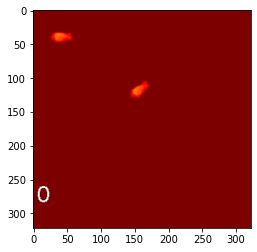

(322, 322, 3)


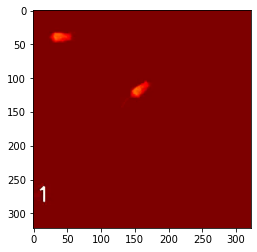

(322, 322, 3)


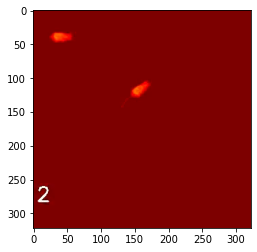

(322, 322, 3)


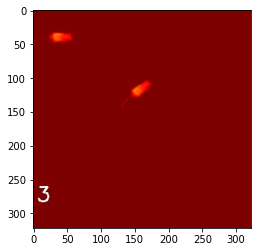

(322, 322, 3)


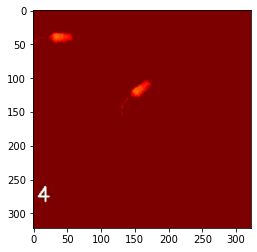

In [7]:
import cv2
cap = cv2.VideoCapture('/Users/aishwaryaharpale/Downloads/2021-02-19_Meloxicam/_aggregate_results/2020-12-07_17-35-25_12-07-20_meloxicam-exp--1-2_1-2_results_00.mp4')
count = 0
while cap.isOpened() and count<5:
    ret,frame = cap.read()
    print(frame.shape)
    plt.imshow(frame, cmap=plt.get_cmap('gray'))
    plt.show()
    count = count + 1
    # if cv2.waitKey(10) & 0xFF == ord('q'):
    #     break

cap.release()
cv2.destroyAllWindows()